<H1>UK ROAD ACCIDENT DATA ANALYSYS</H1>
<h2>INCLUSIVE YEAR 2019-2022</h2>
<h3>King Jannhel N. Driz</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
accident = pd.read_csv('accident_data.csv')

In [3]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [4]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unknown condition')
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unknown weather')

In [5]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [6]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [7]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['Latitude'] = accident['Latitude'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [8]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [9]:
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident['Accident Date'] = accident['Accident Date'].str.strip()
accident['Accident Date'] = accident['Accident Date'].str.replace('/','-')

In [10]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'],dayfirst=True,errors = 'coerce')

In [11]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [12]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['DayofWeek'] = accident['Accident Date'].dt.dayofweek
accident['Day'] = accident['Accident Date'].dt.day

In [13]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
DayofWeek                  0
Day                        0
dtype: int64

In [14]:
accident['Year'] = accident['Year'].astype('category')
accident['Month'] = accident['Month'].astype('category')
accident['DayofWeek'] = accident['DayofWeek'].astype('category')
accident['Day'] = accident['Day'].astype('category')

In [15]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                             category
Month                            category
DayofWeek                        category
Day                              category
dtype: object

<H1>Insights</H1>

<H1> In what area did the accident happened the most? and the least?</H1>
<h2>1. Birmingham has the most number of accidents while the Clackmannanshire has the least</h2>

In [16]:
accident['District Area'].value_counts()
df_2019 = accident[accident['Year'] == 2019]
print(f"The Total value of accident in 2019 in District Areas {df_2019['District Area'].value_counts().sum()}")
df_2019['District Area'].value_counts().sort_index()

The Total value of accident in 2019 in District Areas 182115


District Area
Aberdeen City    365
Aberdeenshire    552
Adur             171
Allerdale        305
Alnwick          107
                ... 
Wychavon         366
Wycombe          502
Wyre             328
Wyre Forest      230
York             503
Name: count, Length: 422, dtype: int64

<H1> On what specific day of the week did the accident happened the least and the most?</H1>
<h2>2. Saturday has the most number of accidents while the Monday has the least</h2>

In [17]:
accident['DayofWeek'].value_counts()

DayofWeek
5    107178
2     99558
3     99511
4     97900
1     94550
6     89302
0     72680
Name: count, dtype: int64

<H1> On what month did the accident happened the least and the most?</H1>
<h2>3. November has the highest recorder number of accidents while the February has the least</h2>

In [18]:
accident['Month'].value_counts()

Month
11    60424
10    59580
7     57445
6     56481
9     56455
5     56352
3     54086
8     53913
1     52872
12    51836
4     51744
2     49491
Name: count, dtype: int64

<H1> On what Year has the highest and lowest recorded accidents?</H1>
<h2>4. Year 2019 has the highest recorder number of accidents while year 2022 has the least</h2>

In [19]:
accident['Year'].value_counts()

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

<H1> What Road Type did the accident happened the most? and the least?</H1>
<h2>5. Single carriageway is the Road Type that has most number of accidents while the Slip road has the least</h2>

In [20]:
accident['Road_Type'].value_counts()

Road_Type
Single carriageway    496663
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

<H1> What Weather Condition did the accident happened the most? and the least?</H1>
<h2>6. The Weather Condition that has most number of accidents is Fine no high winds while the Snowing + high winds has the least</h2>

In [21]:
accident['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
unknown weather           14128
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<H1> What is the largest number of casualties happened considering the Road Type and Weather Conditions </H1>
<h2>7. The maximum number of casualties recorded was 524703 happened in Single Carriageway during Fine no high winds</h2>

In [22]:
accident.groupby(['Road_Type','Weather_Conditions'])['Number_of_Casualties'].sum()

Road_Type           Weather_Conditions   
Dual carriageway    Fine + high winds          2191
                    Fine no high winds       113679
                    Fog or mist                1136
                    Other                      3246
                    Raining + high winds       3000
                    Raining no high winds     19598
                    Snowing + high winds        257
                    Snowing no high winds      1427
                    unknown weather            2343
One way street      Fine + high winds           187
                    Fine no high winds        13104
                    Fog or mist                  36
                    Other                       381
                    Raining + high winds        200
                    Raining no high winds      1775
                    Snowing + high winds         15
                    Snowing no high winds        96
                    unknown weather             378
Roundabout          Fi

<h1> What type of vehicle has the highest recorded accident on both urban and rural area? What is the total number of casualties of that vehicle on respective areas?</h1>
<H2>8. Car is the type of vehicle that has the highest record of accident, 181922 is the total number of casualties in Rural Area while 316062 in Urban area which also concludes that Car accidents happened more in Urban Area</H2>

In [23]:
casual = accident.groupby(['Urban_or_Rural_Area','Vehicle_Type'])['Number_of_Casualties'].size()

In [24]:
casual

Urban_or_Rural_Area  Vehicle_Type                         
Rural                Agricultural vehicle                        675
                     Bus or coach (17 or more pass seats)       9025
                     Car                                      181922
                     Data missing or out of range                  0
                     Goods 7.5 tonnes mgw and over              6156
                     Goods over 3.5t. and under 7.5t            2232
                     Minibus (8 - 16 passenger seats)            718
                     Motorcycle 125cc and under                 5023
                     Motorcycle 50cc and under                  2710
                     Motorcycle over 125cc and up to 500cc      2674
                     Motorcycle over 500cc                      8957
                     Other vehicle                              1994
                     Pedal cycle                                  70
                     Ridden horse           

<H1>Is there a correlation between the number of vehicles been accident and the number of casualties </H1>
<h2>9. The number of vehicles been accident has no correlation on the number of casualties</h2>

In [25]:
cas_veh = accident['Number_of_Vehicles'].corr(accident['Number_of_Casualties'])

In [26]:
cas_veh

np.float64(0.22888886126927557)

<H1> How many casualties happened in a Urban and Rural area every day of the week</H1>
<h2>10. The table shows the number of casualties every day of the week in Rural and Urban area, as we can see Saturday (5) has the highest number in both of the area. We can also say that Wednesday(2) and Thursday(3) has somehow the same number. Lastly, Monday(0) has the lowest number of casualties among the day</h2>

In [27]:
dow = accident.groupby(['DayofWeek','Urban_or_Rural_Area'])['Number_of_Casualties'].sum()

In [28]:
dow.unstack()

Urban_or_Rural_Area,Rural,Unallocated,Urban
DayofWeek,,,
0,47870,1,58655
1,48668,0,77253
2,49877,3,81330
3,49815,3,81652
4,49190,2,80353
5,56301,3,88491
6,51794,1,75306


<H1> How was the number of casualties in accident change every month in Urban and Rural Area?</H1>
<h2>11. The table shows the number of casualties every Month in Rural and Urban area, we can see the changes in of numbers in every month. As shown, Urban area has greater number compared to Rural, from the month of January the number decreases on February but it increases again on March. We can see this pattern on the given table, sometimes increases and sometimes decreases. But to conclude, November got the highest number of casualties on both area while February has the lowest. </h2>

In [29]:
mot = accident.groupby(['Month','Urban_or_Rural_Area'])['Number_of_Casualties'].sum()

In [30]:
mot.unstack()

Urban_or_Rural_Area,Rural,Unallocated,Urban
Month,,,
1,28298,1,42739
2,26352,0,40161
3,27615,1,45460
4,27645,1,42974
5,29995,4,46797
6,29762,2,46532
7,31603,1,46886
8,32216,0,43064
9,29361,0,46692


<h1>On what exact date has the maximum number of casualty?</h1>
<H2>12. As shown in the graph, it is January 3, 2019 that has the maximum number of casualties with total of 68</H2>

In [31]:
maxi = accident.groupby(['Month','Day','Year'])['Number_of_Casualties'].max()

In [32]:
maxi.unstack()

Year       2019  2020  2021  2022
Month Day                        
1     1     8.0   9.0   7.0   5.0
      2     7.0   5.0   6.0   8.0
      3    68.0   7.0   5.0   6.0
      4     9.0   7.0   5.0   4.0
      5     8.0   7.0  11.0   5.0
...         ...   ...   ...   ...
12    27    5.0   5.0  10.0   7.0
      28    9.0  10.0  10.0   7.0
      29    7.0   6.0   6.0   7.0
      30    5.0   4.0   5.0   5.0
      31    9.0   6.0   6.0   8.0

[372 rows x 4 columns]

In [33]:
maxi.max()

np.float64(68.0)

In [34]:
maxi.idxmax()

(np.int32(1), np.int32(3), np.int32(2019))

<h1>On what exact date has the highest total number of casualty?</h1>
<H2>13. It is 07/13/2019 or August 13, 2019 that has the highest total number of casualties with total of 963</H2>

In [35]:
mixi = accident.groupby(['Month','Day','Year'])['Number_of_Casualties'].sum()

In [36]:
mixi.unstack()

Year       2019  2020  2021  2022
Month Day                        
1     1     494   360   360   373
      2     505   349   427   400
      3     605   426   506   371
      4     553   539   413   484
      5     587   489   620   450
...         ...   ...   ...   ...
12    27    373   402   342   266
      28    486   383   421   274
      29    445   377   391   303
      30    251   435   333   242
      31    341   367   366   262

[372 rows x 4 columns]

In [37]:
mixi.max()

np.int64(963)

In [38]:
mixi.idxmax()

(np.int32(7), np.int32(13), np.int32(2019))

<H1>Does the accident severity correlates to Number of Casualties?</H1>
<H2>14. NO, Accident Severity has no correlation between number of casualties</H2>

In [39]:
f_stats,p_value = f_oneway(accident[accident['Accident_Severity'] == 'Slight']['Number_of_Casualties'],
                           accident[accident['Accident_Severity'] == 'Serious']['Number_of_Casualties'],
                           accident[accident['Accident_Severity'] == 'Fatal']['Number_of_Casualties'])
print(p_value)

0.0


In [40]:
accident['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<H1>Does the Light Conditions correlates to Number of Vehicles being accident?</H1>
<H2>15. NO,Light Conditions has no correlation between number of vehicles being accident</H2>

In [41]:
f_stats,p_value = f_oneway(accident[accident['Light_Conditions'] == 'Daylight']['Number_of_Vehicles'],
                           accident[accident['Light_Conditions'] == 'Darkness - lights lit']['Number_of_Vehicles'],
                           accident[accident['Light_Conditions'] == 'Darkness - no lighting']['Number_of_Vehicles'],
                           accident[accident['Light_Conditions'] == 'Darkness - lighting unknown']['Number_of_Vehicles'],
                           accident[accident['Light_Conditions'] == 'Darkness - lights unlit']['Number_of_Vehicles'])
                           
print(p_value)

0.0


<h1>What weather condition result to FATAL accident severity?</h1>
<h2>16. As we can see on the table, Fine no high winds weather condition mostly leads to a Fatal accident severity</h2>

In [42]:
was = accident.groupby(['Weather_Conditions','Accident_Severity']).size()

In [43]:
was.unstack()

Accident_Severity,Fatal,Serious,Slight
Weather_Conditions,,,
Fine + high winds,175,1245,7134
Fine no high winds,7100,72046,441739
Fog or mist,82,483,2963
Other,165,1801,15184
Raining + high winds,145,1261,8209
Raining no high winds,848,9468,69380
Snowing + high winds,3,109,773
Snowing no high winds,36,565,5637
unknown weather,107,1239,12782


<h1>What Light condition contributes to SERIOUS accident severity?</h1>
<h2>17. As we can see on the table, Daylight Light condition mostly contributes to a Serious accident severity</h2>

In [44]:
acs = accident.groupby(['Light_Conditions','Accident_Severity']).size()

In [45]:
acs.unstack()

Accident_Severity,Fatal,Serious,Slight
Light_Conditions,,,
Darkness - lighting unknown,68,794,5622
Darkness - lights lit,1860,19130,108345
Darkness - lights unlit,45,360,2138
Darkness - no lighting,1612,7174,28651
Daylight,5076,60759,419045


In [46]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                             category
Month                            category
DayofWeek                        category
Day                              category
dtype: object

<h1>On what district area has the highest number of casualty in a single day?</h1>
<h2>18. South Bucks has the highest number of casualtyin a single day</h2>

In [47]:
distmax = accident.groupby(['District Area'])['Number_of_Casualties'].max()

In [48]:
distmax.idxmax()

'South Bucks'

In [49]:
distmax.max()

np.int64(68)

<h1> What Road Surface condition causes most casualty?</h1>
<h2>19. Wet or Damp road surface condition mostly causes casualty</h2>

In [50]:
monthmax = accident.groupby(['Road_Surface_Conditions'])['Number_of_Casualties'].size()

In [51]:
monthmax.idxmax()

'Dry'

<h1>How does the motorcycle accidents mostly categorized (Accident Severity)?  </h1>
<h2>20. As shown, most of motorcycle accidents are categorized as slight severe</h2>

In [52]:
wey = accident.groupby(['Vehicle_Type','Accident_Severity']).size()

In [53]:
wey.unstack()

Accident_Severity,Fatal,Serious,Slight
Vehicle_Type,,,
Agricultural vehicle,21,282,1644
Bus or coach (17 or more pass seats),325,3373,22180
Car,6577,66461,424954
Data missing or out of range,0,0,6
Goods 7.5 tonnes mgw and over,216,2321,14770
Goods over 3.5t. and under 7.5t,67,857,5172
Minibus (8 - 16 passenger seats),29,276,1671
Motorcycle 125cc and under,189,2031,13049
Motorcycle 50cc and under,95,1014,6494


<h1>Bar Plot</h1>

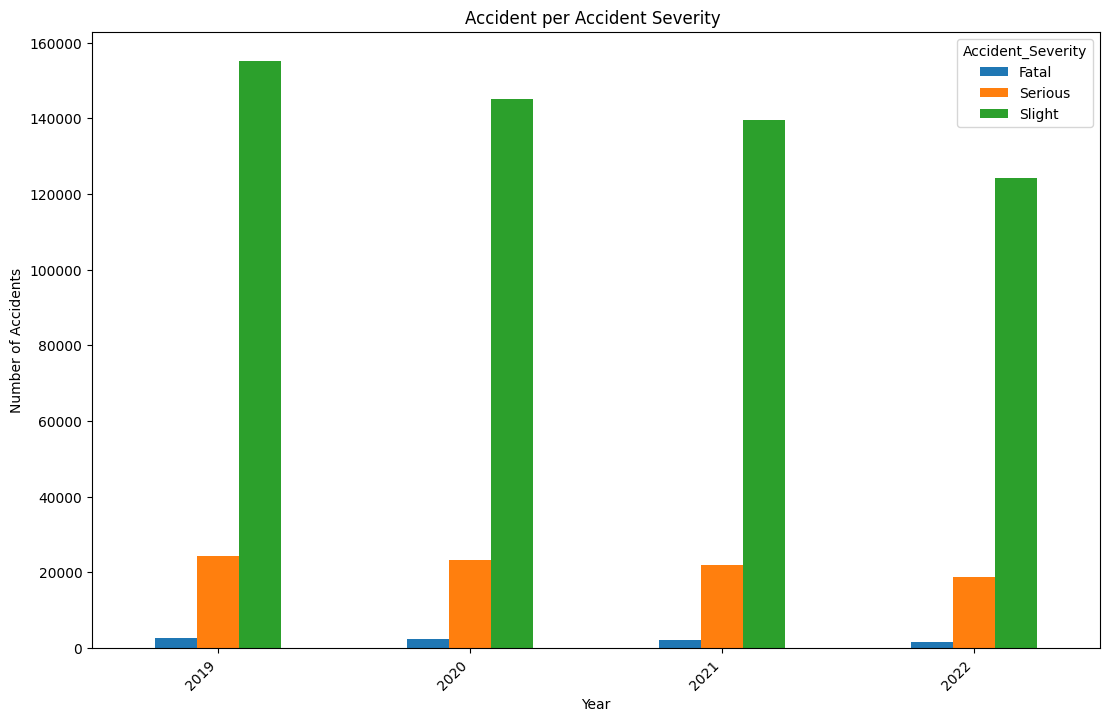

In [54]:
# Accidents considering severity'
accident_per_month_severity = accident.groupby(['Year','Accident_Severity']).size().unstack()

accident_per_month_severity.plot(kind='bar',)
# Plotting accidents per year
plt.title('Accident per Accident Severity ')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.gcf().set_size_inches(13,8)
plt.show()

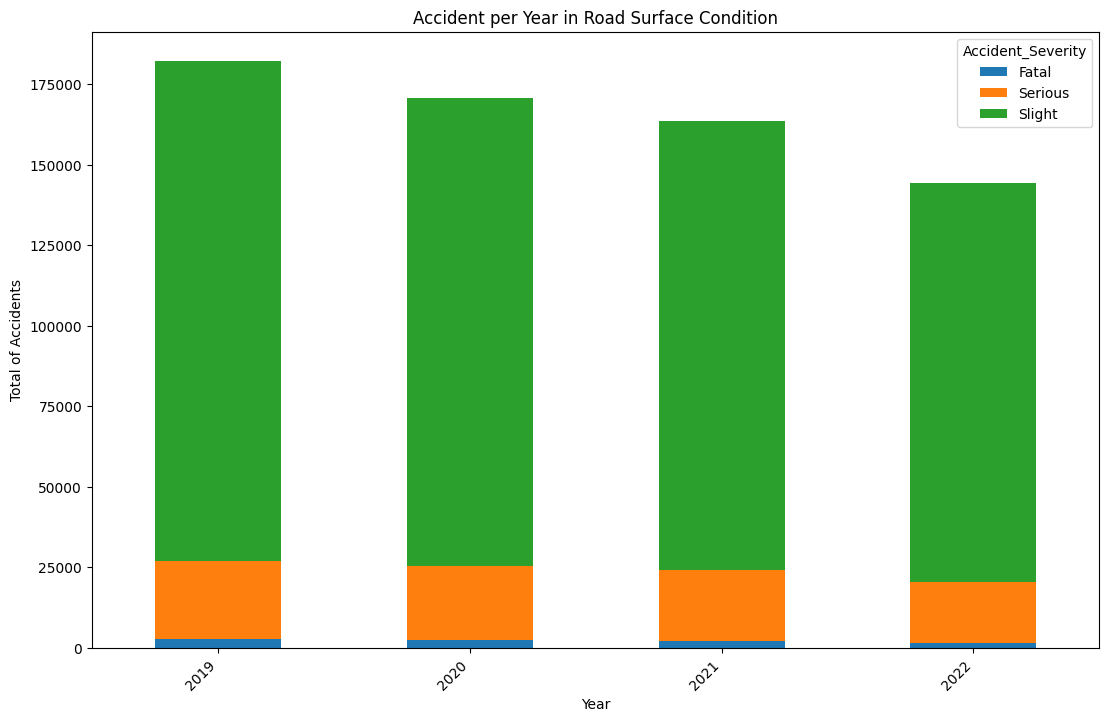

In [55]:
# Accidents considering severity'
accident_per_year = accident.groupby(['Year','Accident_Severity']).size().unstack()

accident_per_year.plot(kind='bar', stacked='True')
# Plotting accidents per year
plt.title('Accident per Year in Road Surface Condition')
plt.xlabel('Year')
plt.ylabel('Total of Accidents')
plt.xticks(rotation=45, ha='right')
plt.gcf().set_size_inches(13,8)
plt.show()

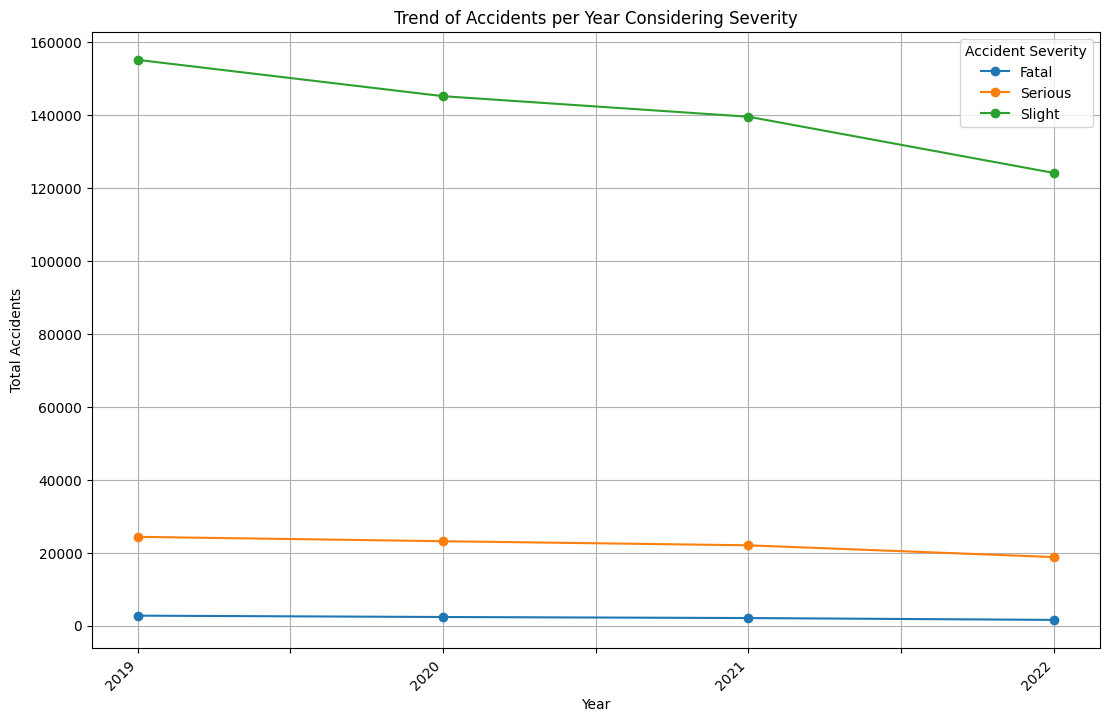

In [56]:
# Plot line chart for accident trends over years
accident_per_year.plot(kind='line', marker='o', figsize=(13, 8))

# Adding title and labels
plt.title('Trend of Accidents per Year Considering Severity')
plt.xlabel('Year')
plt.ylabel('Total Accidents')

# Formatting x-axis
plt.xticks(rotation=45, ha='right')

# Adding legend and grid
plt.legend(title='Accident Severity')
plt.grid(True)

# Show plot
plt.show()


In [57]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], errors='coerce')
accident['Year'] = accident['Accident Date'].dt.year

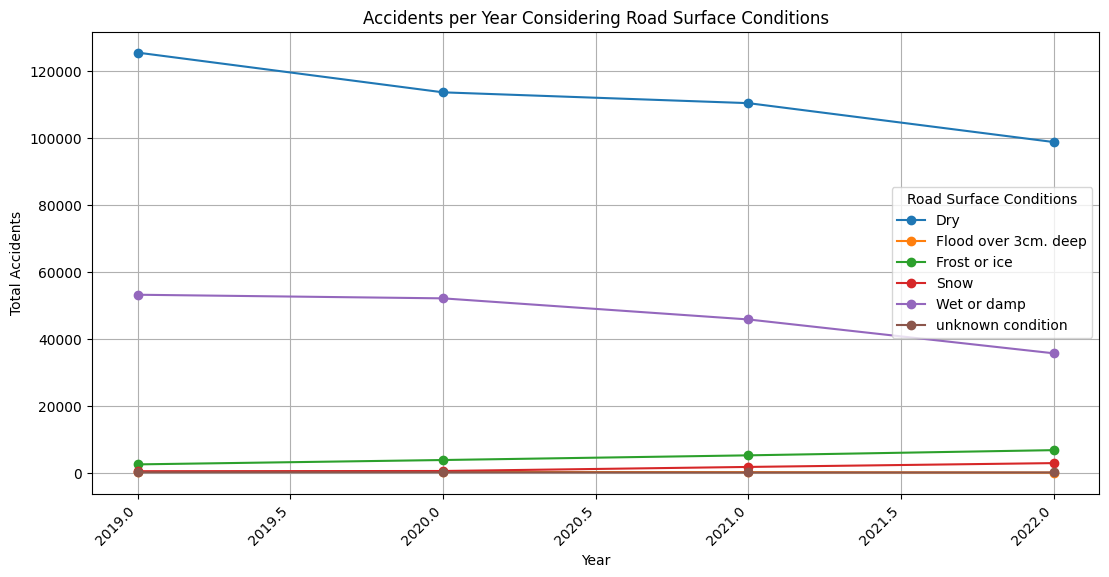

In [58]:
# 1. Accidents by Road Surface Conditions Over the Years (Line Plot)
road_surface_per_year = accident.groupby(['Year', 'Road_Surface_Conditions']).size().unstack()

road_surface_per_year.plot(kind='line', marker='o', figsize=(13, 6))
plt.title('Accidents per Year Considering Road Surface Conditions')
plt.xlabel('Year')
plt.ylabel('Total Accidents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Road Surface Conditions')
plt.grid(True)
plt.show()

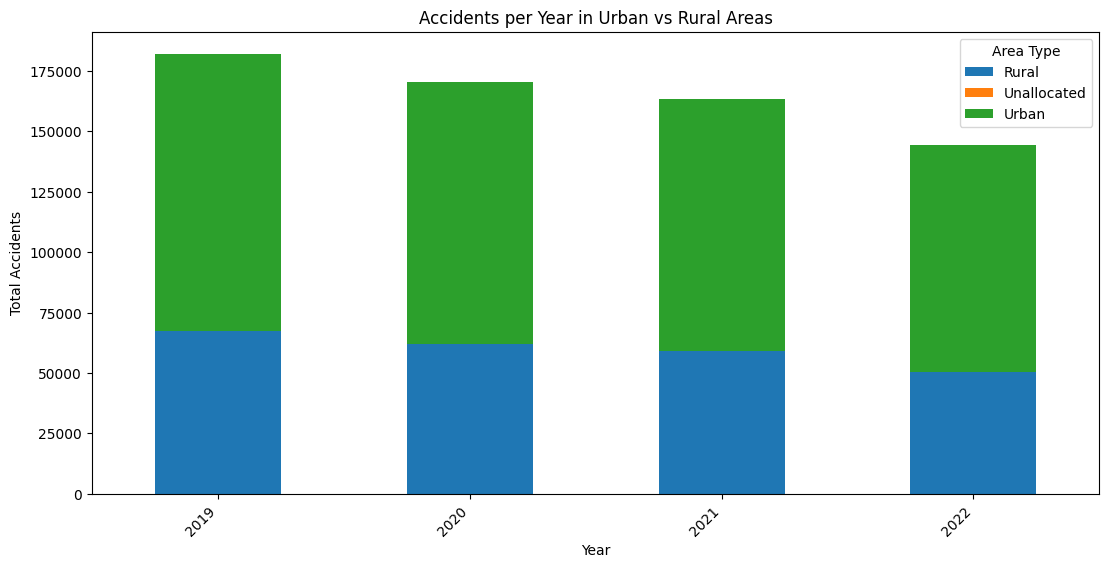

In [61]:
# 2. Accidents by Urban vs Rural Areas Over the Years (Bar Plot)

urban_rural_per_year = accident.groupby(['Year', 'Urban_or_Rural_Area']).size().unstack()

urban_rural_per_year.plot(kind='bar', stacked=True, figsize=(13, 6))
plt.title('Accidents per Year in Urban vs Rural Areas')
plt.xlabel('Year')
plt.ylabel('Total Accidents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Area Type')
plt.show()

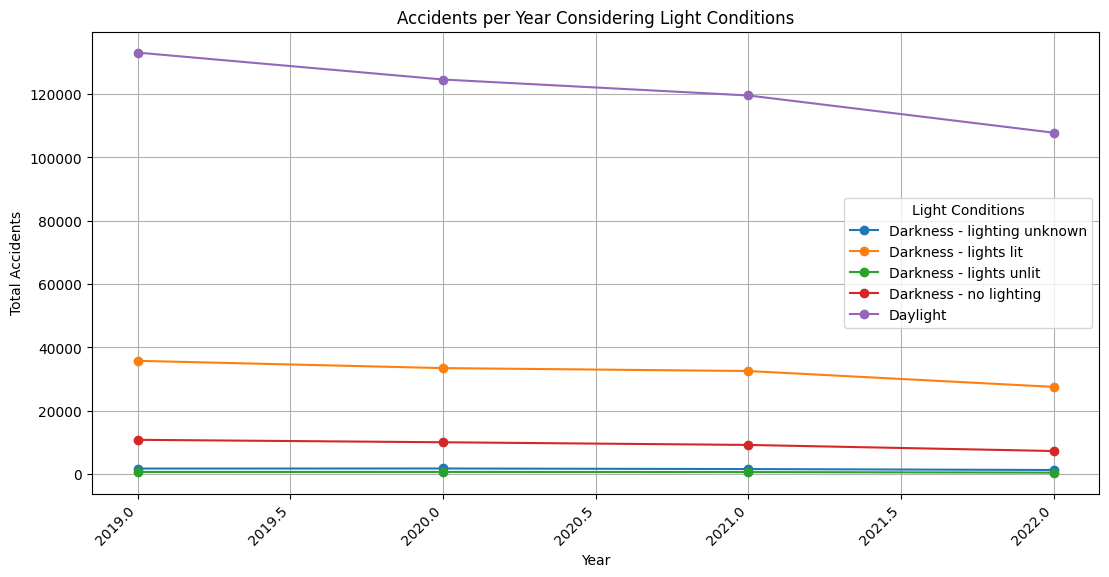

In [60]:
# 3. Accidents by Light Conditions Over the Years (Line Plot)
light_conditions_per_year = accident.groupby(['Year', 'Light_Conditions']).size().unstack()

light_conditions_per_year.plot(kind='line', marker='o', figsize=(13, 6))
plt.title('Accidents per Year Considering Light Conditions')
plt.xlabel('Year')
plt.ylabel('Total Accidents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Light Conditions')
plt.grid(True)
plt.show()
